# 初始化

In [0]:
#@markdown - **挂载** 
from google.colab import drive
drive.mount('GoogleDrive')

In [0]:
# #@markdown - **卸载**
# !fusermount -u GoogleDrive

# 代码区

In [0]:
#@title K-近邻算法 { display-mode: "both" }
# 该程序实现 k-NN 对三维随机数据的分类
#@markdown [参考程序](https://github.com/wzyonggege/statistical-learning-method/blob/master/KNearestNeighbors/KNN.ipynb)
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [0]:
#@markdown - **绑定数据**
class Bunch(dict):  
	def __init__(self,*args,**kwds):  
		super(Bunch,self).__init__(*args,**kwds)  
		self.__dict__ = self

In [0]:
#@markdown - **生成带标签随机数据函数**
def generate_random(sigma, N, mu1=[25., 25., 20], mu2=[30., 40., 30]):  
	c = sigma.shape[-1]        # 生成N行3维的随机测试数据
	X = np.zeros((N, c))       # 初始化X，N行2列。3维数据，N个样本 
	target = np.zeros((N,1))
	for i in range(N):  
		if np.random.random(1) < 0.5:  # 生成0-1之间随机数  
			X[i, :]  = np.random.multivariate_normal(mu1, sigma[0, :, :], 1)     #用第一个高斯模型生成2维数据  
			target[i] = 1
		else:  
			X[i, :] = np.random.multivariate_normal(mu2, sigma[1, :, :], 1)      #用第四个高斯模型生成2维数据  
			target[i] = -1
	return X, target

In [0]:
#@markdown - **KNN 类**
class KNN:
    def __init__(self, X_train, y_train, n_neighbors=3, p=2):
        """
        parameter: n_neighbors 临近点个数, 最好选奇数
        parameter: p 距离度量
        """
        if n_neighbors % 2 == 0:
            print('n_neighbors 最好为奇数！')
        self.n = n_neighbors
        self.p = p
        self.X_train = X_train
        self.y_train = y_train.flatten()
    
    def predict(self, X):
        # 取出n个点
        knn_list = []
        for i in range(self.n):
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            knn_list.append((dist, self.y_train[i]))
            
        # 遍历得到距离最近的 n 个点    
        for i in range(self.n, len(self.X_train)):
            max_index = knn_list.index(max(knn_list, key=lambda x: x[0]))
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist, self.y_train[i])
                
        # 预测类别
        knn = np.array([k[-1] for k in knn_list])
        return np.sign(knn.sum()) if knn.sum() != 0 else 1
    
    def score(self, X_test, y_test):
        y_test = y_test.flatten()
        right_count = 0
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right_count += 1
        return right_count / X_test.shape[0]

In [0]:
#@markdown - **生成带标签的随机数据**
k, N = 2, 400
# 初始化方差，生成样本与标签
sigma = np.zeros((k, 3, 3))
for i in range(k):
	sigma[i, :, :] = np.diag(np.random.randint(10, 25, size=(3, )))
sample, target = generate_random(sigma, N)
feature_names = ['x_label', 'y_label', 'z_label'] # 特征数
target_names = ['gaussian1', 'gaussian2', 'gaussian3', 'gaussian4'] # 类别
data = Bunch(sample=sample, feature_names=feature_names, target=target, target_names=target_names)
sample_t, target_t = generate_random(sigma, N)
data_t = Bunch(sample=sample_t, target=target_t)

In [6]:
#@markdown - **模型训练**
model = KNN(data.sample, target, n_neighbors=4, p=2)
model.predict(data.sample[100])

n_neighbors 最好为奇数！


-1.0

In [7]:
target.flatten()[100]

-1.0

In [8]:
#@markdown - **测试集精度**
acc = model.score(data_t.sample, data_t.target) * 100
print('Accuracy on testing set: {:.2f}%.'.format(acc))
tar_test = np.array([model.predict(x) for x in data_t.sample], dtype=np.int8) + 1

Accuracy on testing set: 96.75%.


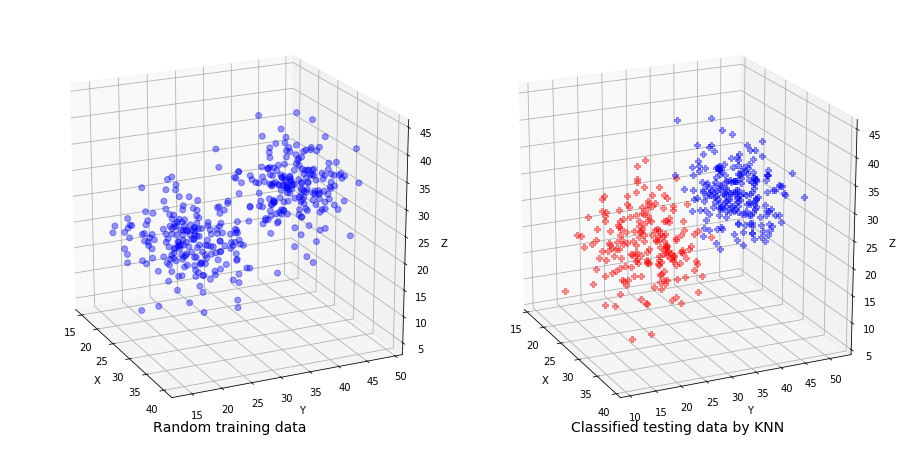

In [9]:
#@markdown - **显示 KNN 对测试数据的分类情况**
titles = ['Random training data', 'Classified testing data by KNN']
TAR = [target, tar_test]
DATA = [data.sample, data_t.sample]
fig = plt.figure(1, figsize=(16, 8))
fig.subplots_adjust(wspace=.01, hspace=.02)
for i, title, data_n, tar in zip([1, 2], titles, DATA, TAR):
    ax = fig.add_subplot(1, 2, i, projection='3d')
    if title == 'Random training data':
        ax.scatter(data_n[:,0], data_n[:,1], data_n[:,2], c='b', s=35, alpha=0.4, marker='o')
    else:
        color=['b','g', 'r']
        for j in range(N):
            ax.scatter(data_n[j, 0], data_n[j, 1], data_n[j, 2], c=color[tar[j]], s=35, alpha=0.4, marker='P')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=20., azim=-25)
    ax.set_title(title, fontsize=14, y=0.01)
plt.show()